# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Bagaimana hubungan antara waltu pengriman dengan rating pelanggan?
- Ketegori produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv('data/customers_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')
product_name_translation_df = pd.read_csv('data/product_category_name_translation.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

### Assessing Data

Beberapa cell di bawah ini digunakan untuk menampilkan contoh data dari dataset yang digunakan dan menampilkan informasi umum dari dataset tersebut.

#### Customer DF

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print("Dupliceted values in customers_df: ", customers_df.duplicated().sum())

Dupliceted values in customers_df:  0


Tidak ada masalah yang ditemukan pada dataset customer

#### Orders DF

In [7]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
print("Dupliceted values in orders_df: ", orders_df.duplicated().sum())
orders_df.describe()

Dupliceted values in orders_df:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Beberapa masalah yang ditemukan pada dataset order:
- Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
- Kemungkinan missing value pada kolom-kolom tersebut disebabkan oleh order yang belum selesai atau belum dikirim
- Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya bertipe datetime

#### Order Reviews DF

In [10]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [12]:
print("Dupliceted values in order_reviews_df: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Dupliceted values in order_reviews_df:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Beberapa masalah yang ditemukan pada dataset order_review:
- Terdapat missing value pada kolom review_comment_title dan review_comment_message
- Kolom review_creation_date dan review_answer_timestamp seharusnya bertipe datetime

Namun kedua masalah tersebut tidak perlu diperbaiki karena tidak akan digunakan dalam analisis data

#### Order Items DF

In [13]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
print("Dupliceted values in order_items_df: ", order_items_df.duplicated().sum())
order_items_df.describe()

Dupliceted values in order_items_df:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak ada masalah yang ditemukan pada dataset order_item karena shippping_limit_date tidak akan digunakan dalam analisis data

#### Products DF

In [16]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
print("Dupliceted values in products_df: ", products_df.duplicated().sum())
products_df.describe()

Dupliceted values in products_df:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Beberapa masalah yang ditemukan pada dataset product:
- Terdapat missing value pada beberapa kolom //!
- Kolom product_category_name belum berbahasa Inggris sehingga memerlukan translasi ke dalam bahasa Inggris dengan menggunakan dataset product_name_translation_df

#### Product Name Translation DF

In [19]:
product_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
product_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
print("Dupliceted values in product_name_translation_df: ", product_name_translation_df.duplicated().sum())
product_name_translation_df.describe()

Dupliceted values in product_name_translation_df:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak ada masalah yang ditemukan pada dataset ini

#### Sellers DF

In [22]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [23]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [24]:
print("Dupliceted values in sellers_df: ", sellers_df.duplicated().sum())
sellers_df.describe(include='all')

Dupliceted values in sellers_df:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak ada masalah yang ditemukan pada dataset seller

### Cleaning Data

Mengubah Tipe Data Beberapa Kolom pada Dataset Orders

In [25]:
datetime_columns = ['order_delivered_customer_date', 'order_delivered_carrier_date', 'order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date']
for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

## Exploratory Data Analysis (EDA)

### Explore Delivery Time

Filter data yang memiliki order_status 'delivered' dan menghitung waktu pengiriman dalam hari

count    96469.000000
mean         8.878054
std          8.745881
min        -17.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        205.000000
Name: delivery_time, dtype: float64


<Axes: >

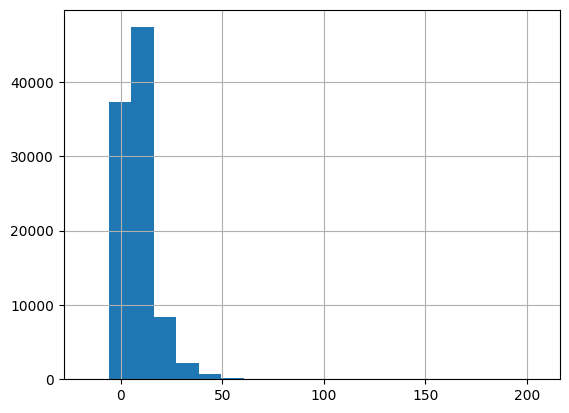

In [26]:
orders_df.loc[orders_df['order_status'] == 'delivered', 'delivery_time'] = (
    orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
).dt.days

print(orders_df['delivery_time'].describe())
orders_df['delivery_time'].hist(bins=20)

Dapat dilihat bahwa terdapat beberapa masalah yaitu:
- Terdapat beberapa data yang memiliki waktu pengiriman negatif
- Terdapat beberapa data yang dapat dikategorikan sebagai outlier
- Terdapat beberapa data yang belum berstatus 'delivered'

Solusi yang dicoba:
- Mengganti data yang memiliki waktu pengiriman negatif dengan median
- Isi data yang belum berstatus 'delivered' dengan median
- Mengganti data yang dapat dikategorikan sebagai outlier (1.5 IQR) dengan median

In [27]:
orders_df.fillna({'delivery_time': orders_df['delivery_time'].median()}, inplace=True)

orders_df['delivery_time'] = orders_df['delivery_time'].apply(lambda x: x if x>=0 else orders_df['delivery_time'].median())

median_delivery_time = orders_df['delivery_time'].median()
Q1 = orders_df.delivery_time.quantile(0.25)
Q3 = orders_df.delivery_time.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
orders_df['delivery_time'] = orders_df['delivery_time'].apply(
    lambda x: median_delivery_time if x > upper_bound else x
)

Dapat dilihat bahwa setelah data dibersihkan, distribusi waktu pengiriman menjadi lebih normal

### Explore Products

In [29]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Menggabungkan dataset products dan product_name_translation_df dan hanya mengambil kolom yang diperlukan

In [30]:
products_en_df = pd.merge(left=products_df, right=product_name_translation_df, on='product_category_name', how='inner')
products_en_df = products_en_df[['product_id', 'product_category_name_english']]
products_en_df.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


Semua kategori produk yang ada sudah diterjemahkan ke dalam bahasa Inggris

In [32]:
products_en_df.isnull().sum()

product_id                       0
product_category_name_english    0
dtype: int64

Melihat top 10 kategori produk yang dijual

In [33]:
products_en_df.groupby('product_category_name_english').size().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
dtype: int64

### Explore Customers

Persentase pelanggan yang pernah order minimal sekali adalah 100%. Hal ini menunjukkan bahwa ecommerce berhasil dalam membangun basis pelanggan dan mengeksekusi strategi pemasaran yang efektif

In [34]:
customers_df['is_active'] = customers_df['customer_id'].isin(orders_df['customer_id'])
print(customers_df.value_counts('is_active'))
print(f"Percentage of active customers: {customers_df.value_counts('is_active').iloc[0] / customers_df.shape[0]*100:}%")

is_active
True    99441
Name: count, dtype: int64
Percentage of active customers: 100.0%


Memilih kolom yang diperlukan dari dataset customers

In [35]:
customers_df = customers_df[['customer_id', 'customer_city', 'customer_state']]

#### Menggabungkan data `customers_df` dan `orders_df`

In [36]:
orders_customers_df = pd.merge(left=orders_df, right=customers_df, on='customer_id', how='left')
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,santo andre,SP


10 Kota dengan jumlah pelanggan terbanyak

In [37]:
orders_customers_df.groupby('customer_city').size().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
dtype: int64

10 state (provinsi) dengan jumlah pelanggan terbanyak

In [38]:
orders_customers_df.groupby('customer_state').size().sort_values(ascending=False).head(20)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
dtype: int64

Dengan melihat data di atas, kita dapat mengoptimalkan strategi pemasaran dengan cara memfokuskan pada 10 kota dan provinsi dengan jumlah pelanggan terbanyak

### Explore Seller

Memilih kolom yang diperlukan dari dataset sellers

In [39]:
sellers_df = sellers_df[['seller_id', 'seller_city', 'seller_state']]
sellers_df.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


10 Kota dengan jumlah penjual terbanyak

In [40]:
sellers_df.groupby('seller_city').size().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
dtype: int64

10 Provinsi dengan jumlah penjual terbanyak

In [41]:
sellers_df.groupby('seller_state').size().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
dtype: int64

Untuk meningkatkan kualitas layanan, kecepatan pengiriman, dan kepuasan pelanggan, kita dapat meningkatkan kerjasama dengan penjual yang berada di 10 kota dan provinsi dengan jumlah pembeli terbanyak

### Explore Order Reviews

Memilih kolom yang diperlukan dari dataset order_reviews_df

In [42]:
order_reviews_df = order_reviews_df[['review_id', 'order_id', 'review_score']]

Menampilkan distribusi rating yang diberikan oleh pelanggan

In [43]:
review_score_order = order_reviews_df.groupby('review_score').agg(
    count=('review_id', 'count'),
    percentage=('review_id', lambda x: x.count() / order_reviews_df.shape[0] * 100)
)

Lebih dari 76% pelanggan memberikan rating 4 dan 5. Hal ini menunjukkan bahwa pelanggan puas dengan layanan yang diberikan oleh ecommerce

### Explore Orders dan Order Items

Menambahkan kolom 'total_price' pada orders_customers_df

In [44]:
total_price = order_items_df.groupby('order_id')['price'].sum().reset_index()

total_price.rename(columns={'price': 'total_price'}, inplace=True)

orders_customers_df = orders_customers_df.merge(total_price, on='order_id', how='left')

In [47]:
orders_customers_df['total_price'].describe()

count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: total_price, dtype: float64

Drop kolom-kolom yang tidak diperlukan

In [49]:
order_items_df.drop(columns=['shipping_limit_date', 'freight_value'], inplace=True)

In [50]:
order_items_df.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


Menampilkan deskripsi statistik dari total_price dan total_produk yang terjual dari order yang dilakukan oleh pelanggan

In [51]:
order_items_df.groupby('order_id').agg({'order_item_id': 'count', 'price': 'sum'}).describe().rename(columns={'order_item_id': 'total_items', 'price': 'total_price'})

,total_items,total_price
count,98666.000000,98666.000000
mean,1.141731,137.754076
std,0.538452,210.645145
min,1.000000,0.850000
25%,1.000000,45.900000
50%,1.000000,86.900000
75%,1.000000,149.900000
max,21.000000,13440.000000


Dapat dilihat bahwa mayoritas pelaanggan hanya membeli 1 produk saja dalam sekali transaksi dan menghabiskan uang rata-rata sebesar 137.7 dalam sekali transaksi

#### Menggabungkan data `order_items_df` dan `products_df`

In [52]:
sales_product_df = pd.merge(left=order_items_df, right=products_en_df, on='product_id', how='left')
sales_product_df.head()

,order_id,order_item_id,product_id,seller_id,price,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,garden_tools


Menampilkan 30 categori produk yang paling tinggi average_revenue_per_order, total transakasi yang terjual, dan total revenue

In [53]:
sales_product_per_category = sales_product_df.groupby('product_category_name_english').agg({'order_id': 'nunique', 'price': 'sum'}).rename(columns={'order_id': 'total_order', 'price': 'total_revenue'})
sales_product_per_category['average_revenue'] = sales_product_per_category['total_revenue'] / sales_product_per_category['total_order']
sales_product_per_category.head(30).sort_values(by='average_revenue', ascending=False)

,total_order,total_revenue,average_revenue
product_category_name_english,,,
computers,181,222963.13,1231.840497
agro_industry_and_commerce,182,72530.47,398.519066
construction_tools_safety,167,40544.52,242.781557
air_conditioning,253,55024.96,217.489960
construction_tools_construction,748,144677.59,193.419238
cool_stuff,3632,635290.85,174.914882
construction_tools_lights,244,41080.00,168.360656
costruction_tools_tools,97,15903.95,163.958247
auto,3897,592720.11,152.096513


### Merge All Datasets

In [54]:
all_df = pd.merge(left=sales_product_df, right=orders_customers_df, on='order_id', how='left')
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_city,customer_state,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,campos dos goytacazes,RJ,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0,santa fe do sul,SP,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0,para de minas,MG,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,atibaia,SP,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0,varzea paulista,SP,199.90


Menampilkan total revenue dari setiap kategori produk bedasarkan kota konsumen

In [55]:
all_df.groupby(by=['customer_city', 'product_category_name_english']).agg({ 'price': 'sum'}).rename(columns={'price': 'total_revenue'})

total_revenue
customer_city       product_category_name_english               
abadia dos dourados books_general_interest                 39.90
                    cool_stuff                            199.00
                    sports_leisure                        120.00
abadiania           small_appliances                      949.99
abaete              baby                                   65.00
...                                                          ...
ze doca             food_drink                             65.00
                    garden_tools                           39.90
                    musical_instruments                   359.00
                    sports_leisure                        149.90
zortea              computers_accessories                  69.90

[25199 rows x 1 columns]

Menampilkan total revenue dari setiap kategori produk bedasarkan provinsi konsumen

In [56]:
all_df.groupby(by=['customer_state', 'product_category_name_english']).agg({ 'price': 'sum'})

price
customer_state product_category_name_english         
AC             auto                            540.98
               baby                            697.84
               bed_bath_table                  567.70
               books_general_interest          633.80
               christmas_supplies               69.90
...                                               ...
TO             sports_leisure                 5144.32
               stationery                      276.80
               telephony                      1268.12
               toys                           1864.15
               watches_gifts                  5446.89

[1356 rows x 1 columns]

Menampilkan total revenue dan total order bedasarkan provinsi konsumen

In [57]:
all_df.groupby(by='customer_state').agg({ 'price': 'sum', 'order_id': 'nunique'}).sort_values(by='price', ascending=False).rename(columns={'price': 'total_revenue', 'order_id': 'total_order'})

,total_revenue,total_order
customer_state,,
SP,5202955.05,41375
RJ,1824092.67,12762
MG,1585308.03,11544
RS,750304.02,5432
PR,683083.76,4998
SC,520553.34,3612
BA,511349.99,3358
DF,302603.94,2125
GO,294591.95,2007


Menampilkan total revenue dan total order bedasarkan kota konsumen

In [58]:
all_df.groupby(by='customer_city').agg({ 'price': 'sum', 'order_id': 'nunique'}).sort_values(by='price', ascending=False).rename(columns={'price': 'total_revenue', 'order_id': 'total_order'})

,total_revenue,total_order
customer_city,,
sao paulo,1914924.54,15402
rio de janeiro,992538.86,6834
belo horizonte,355611.13,2750
brasilia,301920.25,2116
curitiba,211738.06,1510
...,...,...
jenipapo de minas,7.48,1
santo antonio do rio abaixo,6.00,1
senador jose porfirio,6.00,1


Export all_df to csv file untuk keperluan pembuatan dashboard

In [59]:
all_df.to_csv('dashboard/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [72]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_city,customer_state,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,campos dos goytacazes,RJ,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0,santa fe do sul,SP,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6.0,para de minas,MG,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,atibaia,SP,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13.0,varzea paulista,SP,199.90


Membuat DataFrame baru yang berisi total revenue dan total order per bulan dan membatasi pada 10 bulan terakhir tanpa menyertakan bulan terakhir karena data belum lengkap

In [73]:
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%b-%y') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df = monthly_orders_df.iloc[-12:-1]
monthly_orders_df

,order_purchase_timestamp,order_count,revenue
13,Oct-17,4568,868525.19
14,Nov-17,7451,1342232.29
15,Dec-17,5624,888455.63
16,Jan-18,7220,1196283.69
17,Feb-18,6694,1102339.01
18,Mar-18,7188,1234154.20
19,Apr-18,6934,1267371.14
20,May-18,6853,1295339.78
21,Jun-18,6160,1084464.37
22,Jul-18,6273,1129722.72


Visualisasi total order dalam 10 bulan terakhir

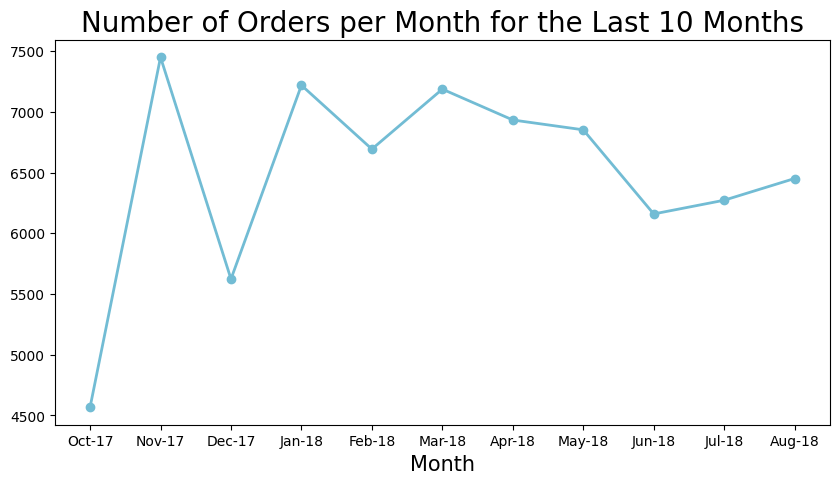

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month for the Last 10 Months", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.show()

Visualisasi total revenue dalam 10 bulan terakhir

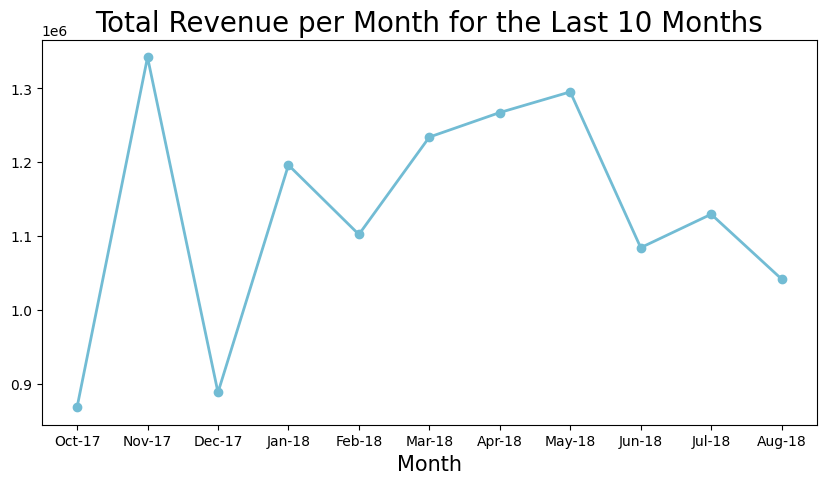

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month for the Last 10 Months", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.show()

Performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir menunjukkan tren yang menurun sejak puncak pada bulan November 2017

### Bagaimana hubungan antara waltu pengriman dengan rating pelanggan?

In [76]:
orders_with_reviews_df = pd.merge(left=orders_df, right=order_reviews_df, on='order_id', how='inner')
orders_with_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,e50934924e227544ba8246aeb3770dd4,5


In [77]:
s=orders_with_reviews_df.groupby('review_score').agg({'delivery_time': 'mean'})
s

,delivery_time
review_score,
1,7.802083
2,7.801650
3,8.021519
4,7.657716
5,6.833589


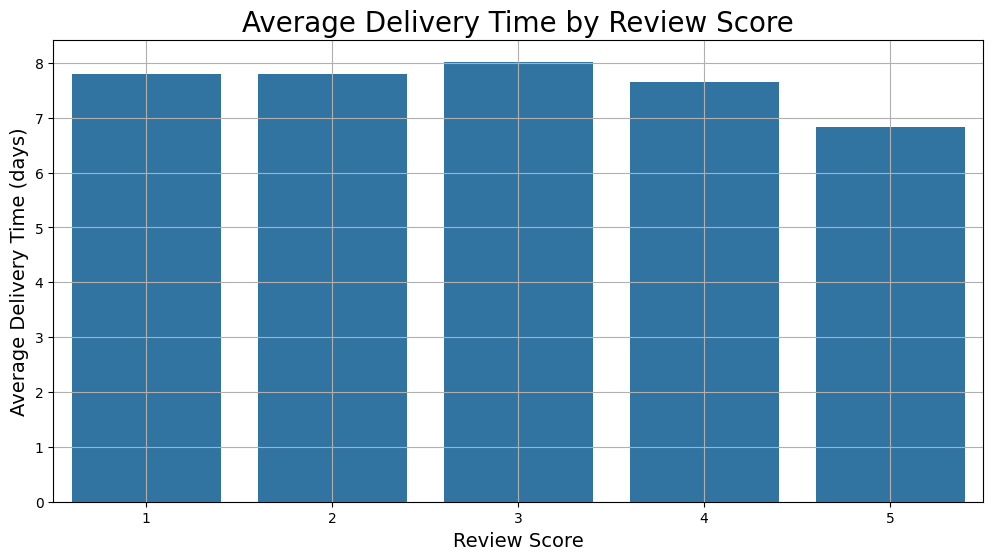

In [78]:
mean_delivery_time = s.groupby('review_score')['delivery_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='review_score', y='delivery_time', data=mean_delivery_time)
plt.title("Average Delivery Time by Review Score", fontsize=20)
plt.xlabel("Review Score", fontsize=14)
plt.ylabel("Average Delivery Time (days)", fontsize=14)
plt.grid(True)
plt.show()


Dapat dilihat bahwa waktu pengiriman tidak dapat memberikan pengaruh yang signifikan terhadap rating pelanggan

### Ketegori produk apa yang paling banyak dan paling sedikit terjual?

Hitung total penjualan bedasarkan kategori produk

In [79]:
sum_order_items_df = all_df.groupby("product_category_name_english").size().reset_index(name='order_count').sort_values(by='order_count', ascending=False)
sum_order_items_df.head(10)

,product_category_name_english,order_count
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


Membuat template visualisasi

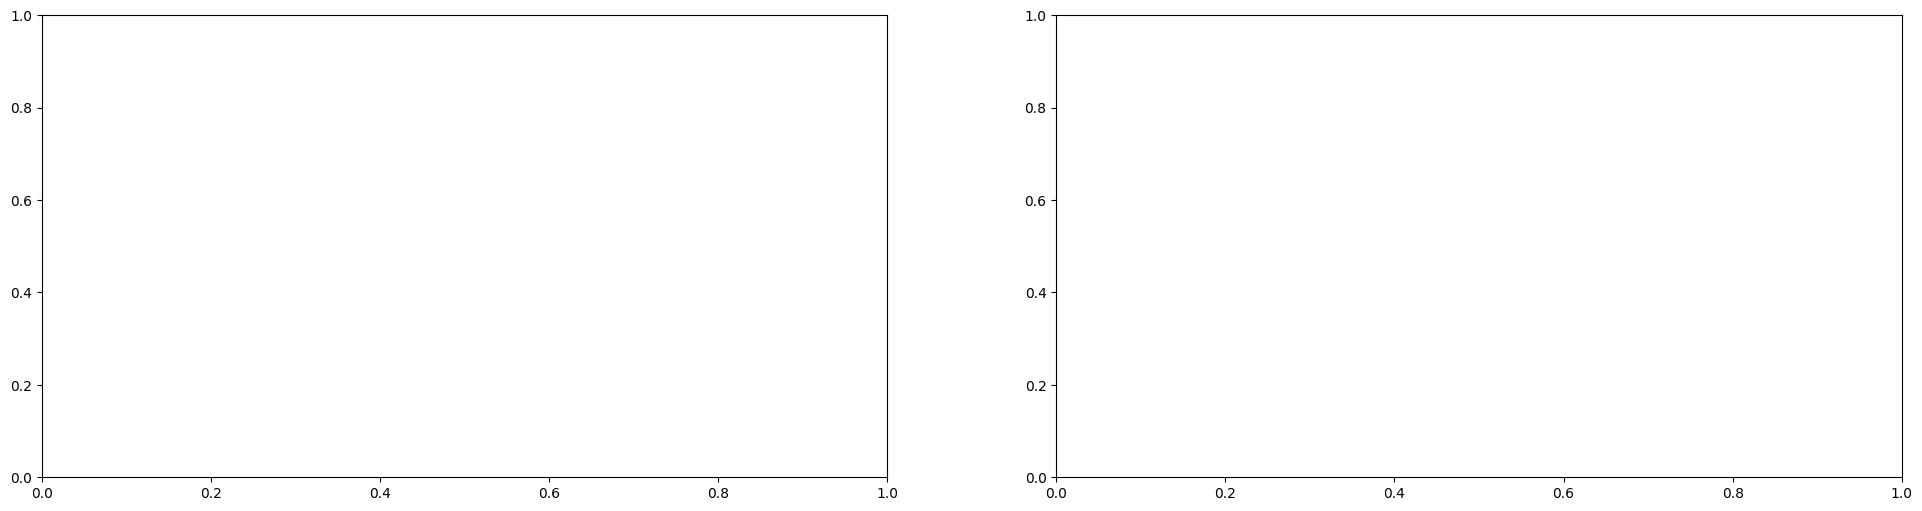

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

Membuat visualisasi 10 kategori produk yang paling banyak dan paling sedikit terjual

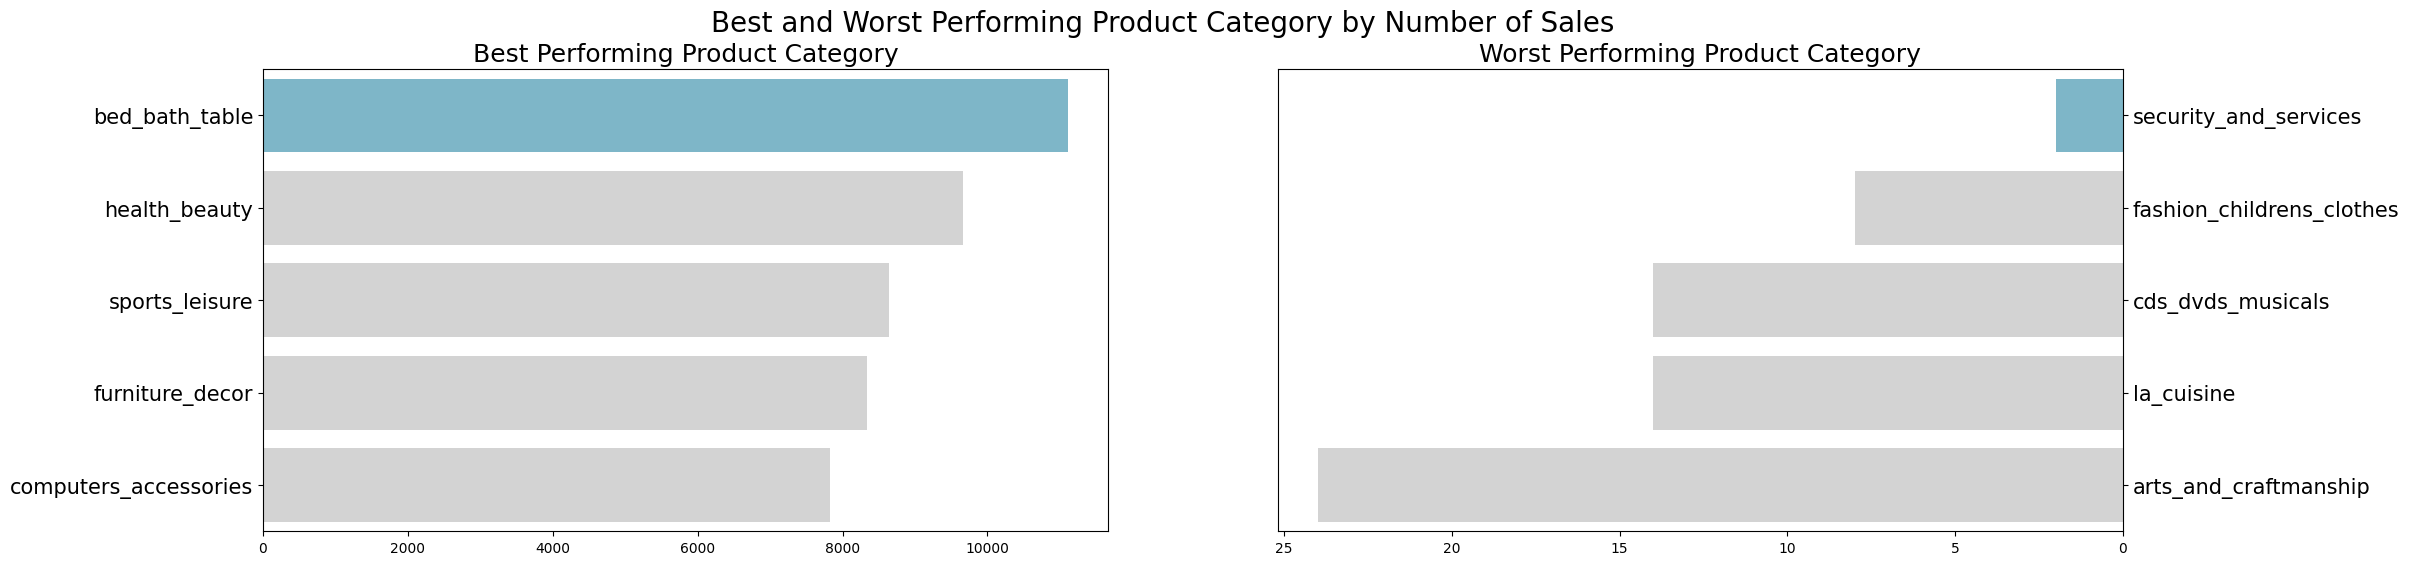

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0], hue="product_category_name_english", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Category", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_count", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1], hue="product_category_name_english", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.show()

Beberapa kategori produk yang paling banyak terjual adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'.

Sedangkan beberapa kategori produk yang paling sedikit terjual adalah 'security_and_services', 'cds_dvds_musicals', dan 'fashion_childrens_clothes'

## Analisis Lanjutan RFM Analysis

RFM Analysis bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

Membuat DataFrame baru yang berisi recency, frequency, dan monetary dari setiap pelanggan

In [114]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


Hitung kapan terakhir pelanggan melakukan transaksi

In [115]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


Drop kolom yang tidak diperlukan

In [116]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df['short_customer_id'] = rfm_df['customer_id'].str[:5]
rfm_df.head()

,customer_id,frequency,monetary,recency,short_customer_id
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,00012
1,000161a058600d5901f007fab4c27140,1,54.90,458,00016
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,0001f
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,00024
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,00037


In [117]:
rfm_df.describe()

,frequency,monetary,recency
count,98666.0,98666.000000,98666.000000
mean,1.0,137.754076,289.716062
std,0.0,210.645145,153.392938
min,1.0,0.850000,44.000000
25%,1.0,45.900000,166.000000
50%,1.0,86.900000,271.000000
75%,1.0,149.900000,400.000000
max,1.0,13440.000000,773.000000


Sorting data berdasarkan recency secara ascending

In [118]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency,short_customer_id
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.0,44,4b7de
76152,c4c66f47534e09a03fc7a878a9eda5ea,1,65.0,49,c4c66
71469,b8c19e70d00f6927388e4f31c923d785,1,169.8,49,b8c19
42327,6e353700bc7bcdf6ebc15d6de16d7002,1,45.9,49,6e353
33320,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,109.9,49,56b1a


Sorting data berdasarkan frequency secara descending

In [119]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency,short_customer_id
98665,ffffa3172527f765de70084a7e53aae8,1,21.80,410,ffffa
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,00012
1,000161a058600d5901f007fab4c27140,1,54.90,458,00016
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,0001f
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,00024


Visualisasi distribusi recency, frequency, dan monetary

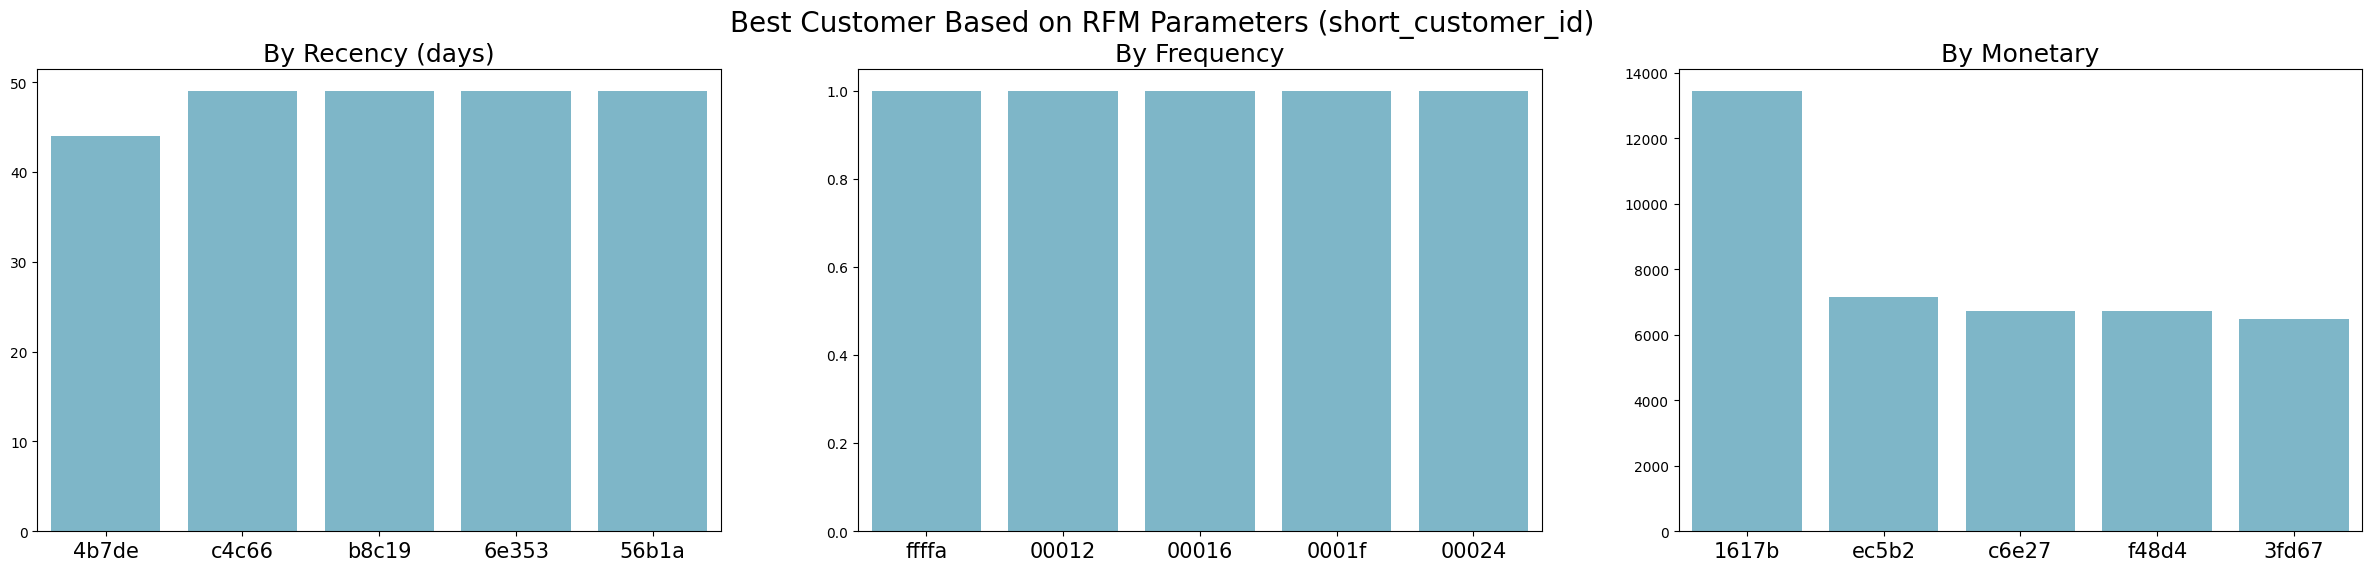

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="customer_id", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_id", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2], hue="customer_id", legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (short_customer_id)", fontsize=20)
plt.show()

Melihat distribusi recency, frequency, dan monetary dari pelanggan

In [121]:
rfm_df.describe()

,frequency,monetary,recency
count,98666.0,98666.000000,98666.000000
mean,1.0,137.754076,289.716062
std,0.0,210.645145,153.392938
min,1.0,0.850000,44.000000
25%,1.0,45.900000,166.000000
50%,1.0,86.900000,271.000000
75%,1.0,149.900000,400.000000
max,1.0,13440.000000,773.000000


Beberapa insight yang didapat:
- Rata-rata pelanggan terakhir melakukan transaksi adalah 289 hari yang lalu
- Rata-rata pelanggan menghabiskan uang sebesar 137.7 total dalam transaksi yang telah dilakukan
- Semua pelanggan melakukan transaksi hanya 1 kali 

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [122]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,short_customer_id,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,00012,33933.0,49333.5,50486.5
1,000161a058600d5901f007fab4c27140,1,54.90,458,00016,16637.5,49333.5,31312.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,0001f,2807.0,49333.5,80169.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,00024,20905.0,49333.5,73730.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,00037,66341.0,49333.5,52932.0


Normalisasi ranking pelanggan

In [123]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,short_customer_id,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,00012,34.391786,100.0,51.169096
1,000161a058600d5901f007fab4c27140,1,54.90,458,00016,16.862445,100.0,31.735856
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,0001f,2.844952,100.0,81.253421
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,00024,21.187643,100.0,74.727363
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,00037,67.237954,100.0,53.647660


Melkakukan perhitungan RFM Score

In [124]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.43
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.32


#### Segmentasi customer berdasarkan RFM_score

In [125]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.43,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


Melihat distribusi segmentasi pelanggan

In [126]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16030
1,Low value customers,41487
2,Medium value customer,34491
3,Top customers,5534
4,lost customers,1124


In [127]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

Visualisasi segmentasi pelanggan

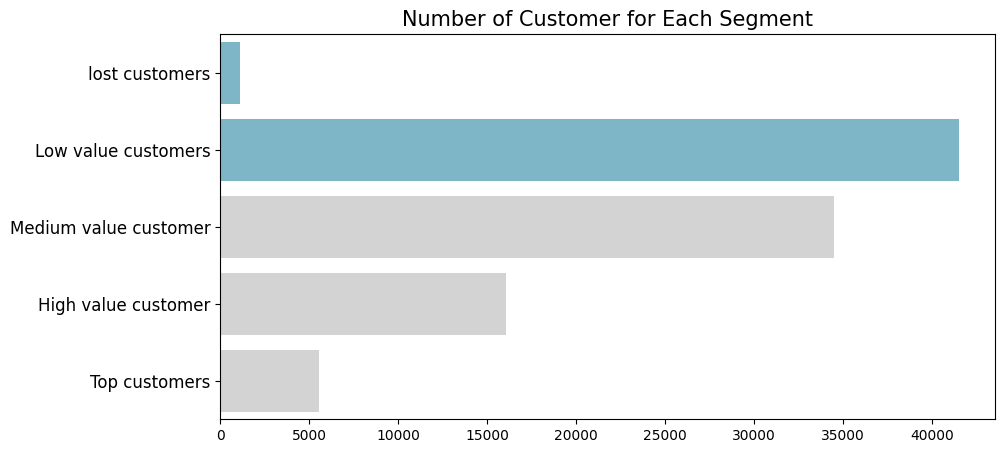

In [128]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_,
    hue="customer_segment",
    legend=False
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Kebanyakaan pelanggan berada pada segmentasi 'Low-Value Customer' dan 'Mid-Value Customer'. Adapun segmen 'High-Value Customer' dan 'Top Customer' memiliki jumlah pelanggan yang lebih banyak dari segmen 'Lost Customer'

## Conclusion

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

>Performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir menunjukkan tren yang menurun sejak puncak pada bulan November 2017

- Bagaimana hubungan antara waltu pengriman dengan rating pelanggan?

>Dapat dilihat bahwa waktu pengiriman tidak dapat memberikan pengaruh yang signifikan terhadap rating pelanggan

- Ketegori produk apa yang paling banyak dan paling sedikit terjual?

>Beberapa kategori produk yang paling banyak terjual adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'.

>Sedangkan beberapa kategori produk yang paling sedikit terjual adalah 'security_and_services', 'cds_dvds_musicals', dan 'fashion_childrens_clothes'

- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
>Rata-rata pelanggan terakhir melakukan transaksi adalah 289 hari yang lalu dan menghabiskan uang sebesar 137.7 total dalam transaksi yang telah dilakukan. Semua pelanggan melakukan transaksi hanya 1 kali 

>Kebanyakaan pelanggan berada pada segmentasi 'Low-Value Customer' dan 'Mid-Value Customer'. Adapun segmen 'High-Value Customer' dan 'Top Customer' memiliki jumlah pelanggan yang lebih banyak dari segmen 'Lost Customer'